In [3]:
import argparse
import collections
import numpy as np
import pims
import cellquant as cq
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from skimage.util import img_as_ubyte
from cellquant.smt import detect_blobs, detect_blobs_batch, fit_psf, fit_psf_batch
%matplotlib notebook

<IPython.core.display.Javascript object>


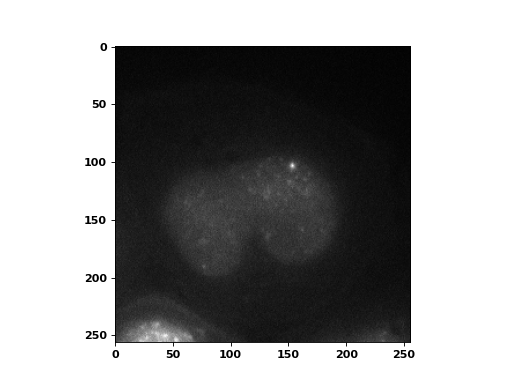

In [4]:
#############################
#Get the raw data 
#############################

file = 'FastImg_Cell01.tif'
im = imread(file)
nt, nx, ny, nc = im.shape
test_im = im[0,:,:,2]
plt.imshow(test_im,cmap='gray')
plt.show()

Det in frame: 2


<IPython.core.display.Javascript object>


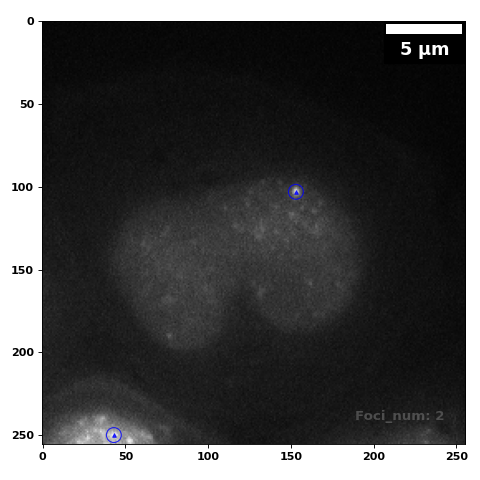

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


In [5]:
#initial example with a high threshold
blobs_df_test, plt_array_test = detect_blobs(test_im,threshold=0.05,diagnostic=True)

<IPython.core.display.Javascript object>


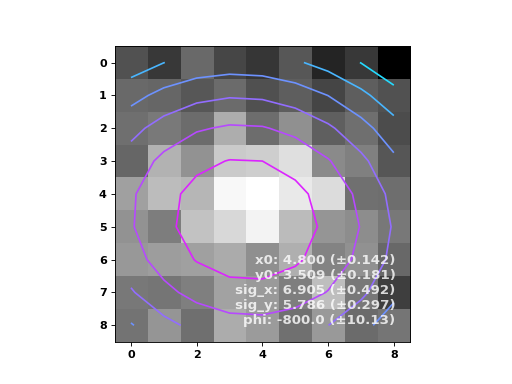

<IPython.core.display.Javascript object>


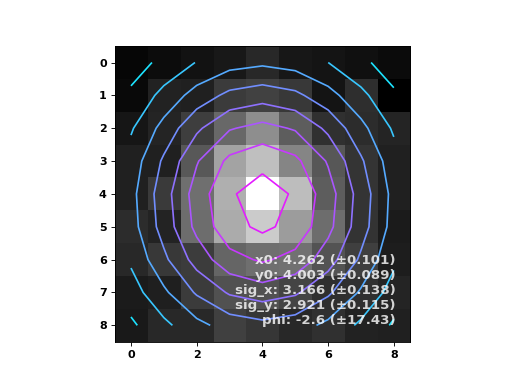

<IPython.core.display.Javascript object>


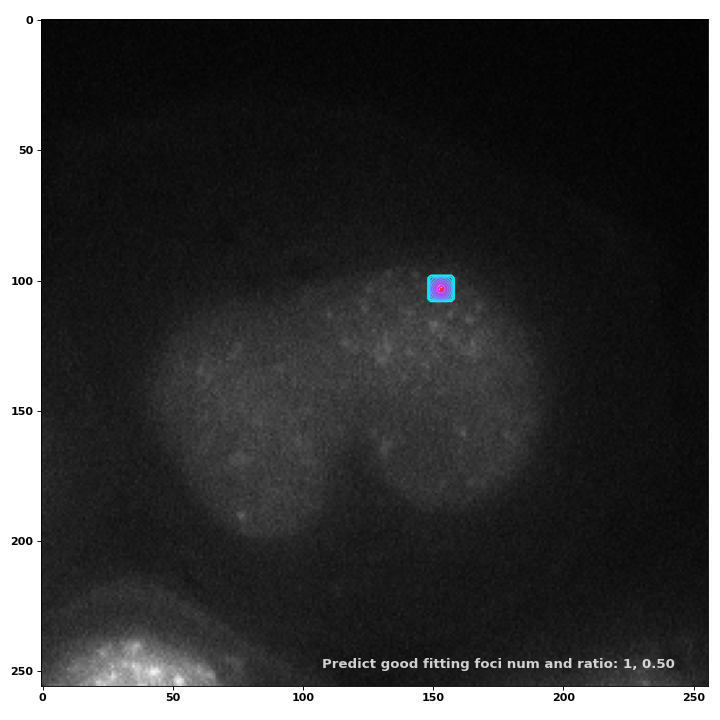

In [6]:
psf_df_test, plt_array_test, error_arr_test = fit_psf(test_im,blobs_df_test,diagnostic=True,pltshow=True,error_diagnostic=True)

Det in frame: 89


/home/cwseitz/anaconda3/envs/thesis/lib/python3.6/site-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/home/cwseitz/anaconda3/envs/thesis/lib/python3.6/site-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/home/cwseitz/anaconda3/envs/thesis/lib/python3.6/site-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/home/cwseitz/anaconda3/envs/thesis/lib/python3.6/site-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))


<IPython.core.display.Javascript object>


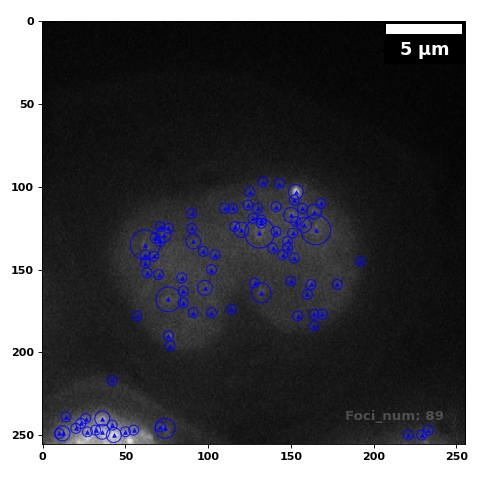

In [16]:
#Now we will lower the threshold to see the fitting errors
blobs_df, plt_array = detect_blobs(test_im,threshold=0.01,diagnostic=True) #don't use a threshold lower than this

<IPython.core.display.Javascript object>


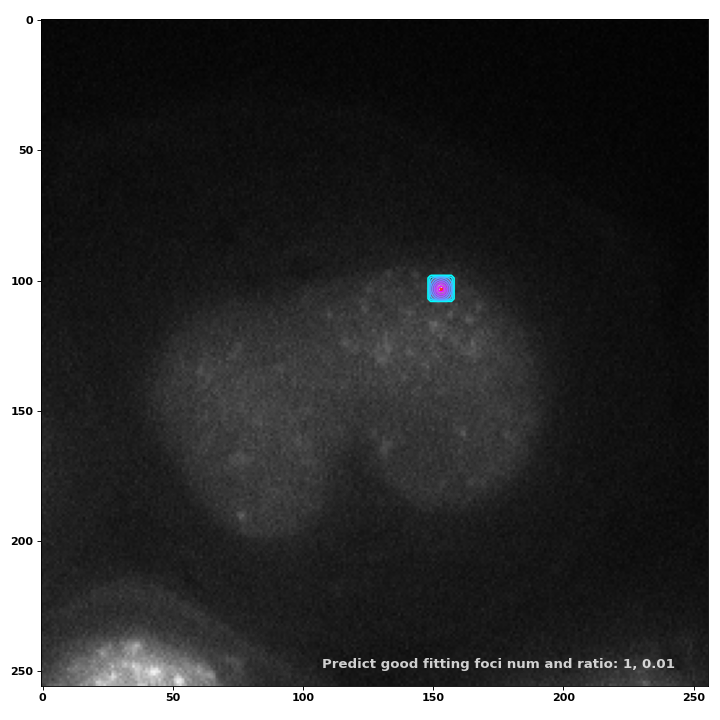

In [14]:
psf_df, plt_array, error_arr = fit_psf(test_im,blobs_df,diagnostic=True,pltshow=True,error_diagnostic=False)

<IPython.core.display.Javascript object>


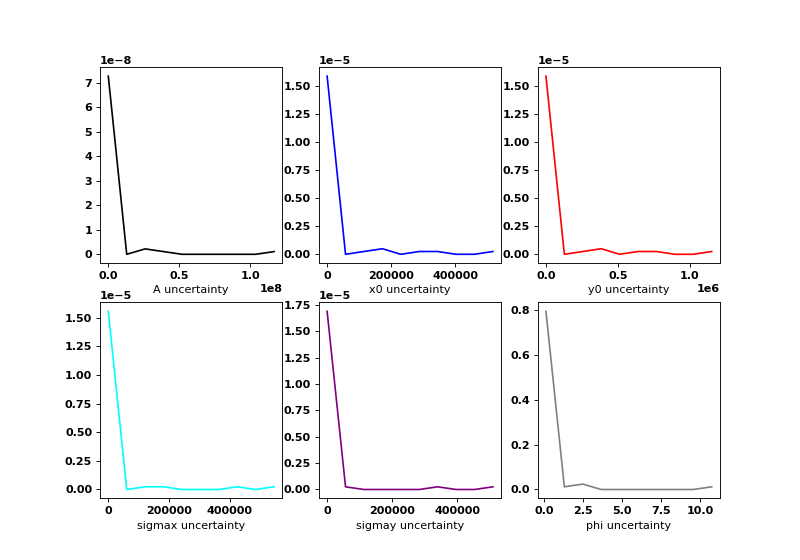

(70, 6)


Text(0.5, 0, 'phi uncertainty')

In [15]:
#Plot the error distribution in x0, y0, sigmax, sigmay, and phi
fig, ax = plt.subplots(2,3,figsize=(10,7))

print(error_arr.shape)
A_err = error_arr[:,0]
x0_err = error_arr[:,1]
y0_err = error_arr[:,2]
sigmax_err = error_arr[:,3]
sigmay_err = error_arr[:,4]
phi_err = error_arr[:,5]

A_err_vals, A_err_bins = np.histogram(A_err,bins=10,density=True)
x0_err_vals, x0_err_bins = np.histogram(x0_err,bins=10,density=True)
y0_err_vals, y0_err_bins = np.histogram(y0_err,bins=10,density=True)
sigmax_err_vals, sigmax_err_bins = np.histogram(sigmax_err,bins=10,density=True)
sigmay_err_vals, sigmay_err_bins = np.histogram(sigmay_err,bins=10,density=True)
phi_err_vals, phi_err_bins = np.histogram(phi_err,bins=10,density=True)

ax[0,0].plot(A_err_bins[:-1],A_err_vals,color='black')
ax[0,1].plot(x0_err_bins[:-1],x0_err_vals,color='blue')
ax[0,2].plot(y0_err_bins[:-1],x0_err_vals,color='red')
ax[1,0].plot(sigmax_err_bins[:-1],sigmax_err_vals,color='cyan')
ax[1,1].plot(sigmay_err_bins[:-1],sigmay_err_vals,color='purple')
ax[1,2].plot(phi_err_bins[:-1],phi_err_vals,color='gray')

ax[0,0].set_xlabel('A uncertainty')
ax[0,1].set_xlabel('x0 uncertainty')
ax[0,2].set_xlabel('y0 uncertainty')
ax[1,0].set_xlabel('sigmax uncertainty')
ax[1,1].set_xlabel('sigmay uncertainty')
ax[1,2].set_xlabel('phi uncertainty')



In [11]:
#Quick report on findings - run several experiments with different values for the threshold and report what you 
#see for the parameter uncertainties. How do they change? Do they all change in the same way? 